In [1]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from molmap import dataset
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from molmap import MolMap
from molmap import feature
# 打开molmap的环境，molmap.model;molmap等宏包会自动导入到这个环境中。
# from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential
from joblib import load,dump #导入模型 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gpuid = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = gpuid
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [3]:
X2 = load('/raid/wx_home/learning/2_190w_model_new/melucule2.data2')

In [4]:
X2.shape

(1937109, 37, 36, 3)

In [5]:
X2_new2 = X2[:,:,:,2]

In [6]:
X2_new2.shape

(1937109, 37, 36)

In [7]:
sum(X2_new2)

array([[     0.,      0.,      0., ..., 118647., 935657.,      0.],
       [     0.,      0.,      0., ..., 814415., 764485., 838445.],
       [     0.,      0.,      0., ..., 286282., 248210., 701745.],
       ...,
       [     0.,      0.,      0., ..., 641304., 659315., 813250.],
       [     0.,      0.,      0., ...,      0.,      0., 210557.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.]])

In [8]:
X3 = X2_new2[:10]

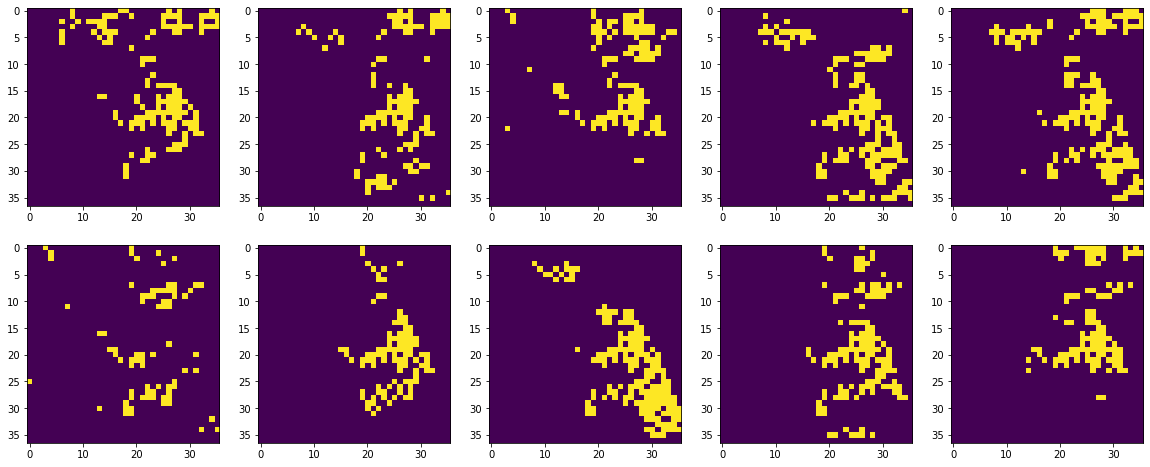

In [9]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(X3[i])

In [10]:
class Encoder(Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.d1 = Dense(1024, activation='relu')
        self.d2 = Dense(512, activation='relu')
        self.d3 = Dense(128, activation='relu')
        self.d4 = Dense(32, activation='relu')
        self.d5 = Dense(16, activation='relu')
        self.d6 = Dense(3, activation='relu')
        
    def call(self,x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        x = self.d5(x)
        return self.d6(x)       
    
    
class Decoder(Model):
    def __init__(self):
        super().__init__()
        self.d7 = Dense(16, activation='relu')
        self.d8 = Dense(32, activation='relu')
        self.d9 = Dense(128, activation='relu')
        self.d10 = Dense(512, activation='relu')
        self.d11 = Dense(1024, activation='relu')
        self.d12 = Dense(1332, activation='sigmoid')
        self.re = Reshape((37,36))
    
    def call(self,x):
        x = self.d7(x)
        x = self.d8(x)
        x = self.d9(x)
        x = self.d10(x)
        x = self.d11(x)
        x = self.d12(x)
        return  self.re(x)
        
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def call(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [18]:
model = Autoencoder()
model.compile(optimizer='Adam',loss='binary_crossentropy')
history1 = model.fit(X2_new2, X2_new2, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0958
Epoch 2/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0720
Epoch 3/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0682
Epoch 4/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0659
Epoch 5/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0667
Epoch 6/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0658
Epoch 7/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0645
Epoch 8/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0659
Epoch 9/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0639
Epoch 10/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0616
Epoch 11/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0603
Epoch 12/100
2523/2523 [==============================] - 21s 8

In [12]:
model.compile(optimizer='Adam',loss='mse')
history2 = model.fit(X2_new2, X2_new2, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0154
Epoch 2/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0152
Epoch 3/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0151
Epoch 4/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0150
Epoch 5/100
2523/2523 [==============================] - 21s 8ms/step - loss: 0.0149
Epoch 6/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0149
Epoch 7/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0148
Epoch 8/100
2523/2523 [==============================] - 19s 8ms/step - loss: 0.0148
Epoch 9/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0147
Epoch 10/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0146
Epoch 11/100
2523/2523 [==============================] - 20s 8ms/step - loss: 0.0147
Epoch 12/100
2523/2523 [==============================] - 20s 8

<AxesSubplot:>

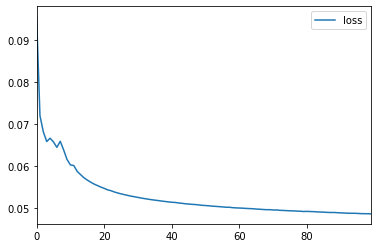

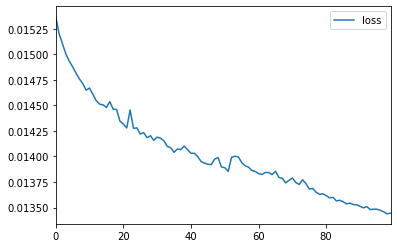

In [19]:
pd.DataFrame(history1.history).plot()
pd.DataFrame(history2.history).plot()

In [22]:
model.save('9_3_model')

In [20]:
y_pre = model.predict(X2_new2[:10])

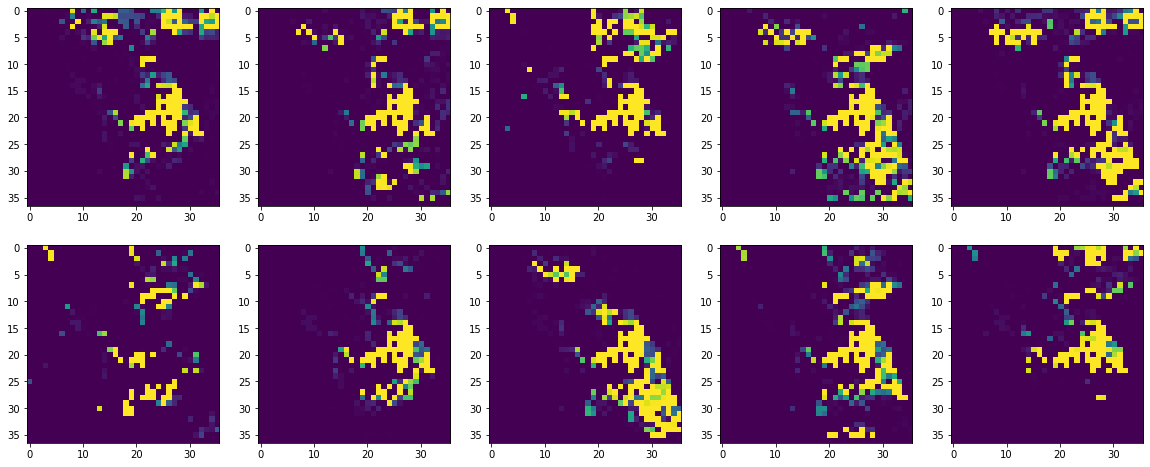

In [21]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(y_pre[i])

In [3]:
model = tf.keras.models.load_model('9_2_model')

In [23]:
X4 = model.encoder(X2_new2[:200000])
X4

<tf.Tensor: shape=(200000, 3), dtype=float32, numpy=
array([[ 6.0789633, 23.283035 ,  7.8805227],
       [ 3.1064074, 17.074696 ,  6.146776 ],
       [73.99754  , 31.889252 , 70.617775 ],
       ...,
       [81.485695 , 25.423353 , 47.89341  ],
       [ 4.249021 , 39.775272 , 22.57201  ],
       [45.41106  , 60.058174 , 30.688501 ]], dtype=float32)>

In [25]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc
 
# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()
 
    try:
        del classifier # this is from global space - change this as you need
    except:
        pass
 
    print(gc.collect()) # if it does something you should see a number as output
 
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

In [26]:
reset_keras()

10290


In [27]:
X6 = model.encoder(X2_new2[200000:400000])
reset_keras()
X7 = model.encoder(X2_new2[400000:600000])
reset_keras()
X8 = model.encoder(X2_new2[600000:800000])
reset_keras()
X9 = model.encoder(X2_new2[800000:1000000])
reset_keras()
X10 = model.encoder(X2_new2[1000000:1200000])
reset_keras()
X11 = model.encoder(X2_new2[1200000:1400000])
reset_keras()
X12 = model.encoder(X2_new2[1400000:1600000])
reset_keras()
X13 = model.encoder(X2_new2[1600000:1800000])
reset_keras()
X14 = model.encoder(X2_new2[1800000:2000000])

100
100
100
100
100
100
100
100


In [30]:
X13

<tf.Tensor: shape=(200000, 3), dtype=float32, numpy=
array([[28.612324 , 17.473991 , 63.62921  ],
       [11.068939 ,  7.3712363,  8.399213 ],
       [ 2.3016233,  1.7109046,  2.0031   ],
       ...,
       [45.896313 , 14.374387 , 54.015575 ],
       [ 3.0189457,  2.530596 ,  2.7631521],
       [ 1.6426458,  2.7836478, 11.29708  ]], dtype=float32)>

In [1]:
dump(X4, '/raid/wx_home/learning/2_190w_model_new/3D_data3/1-200000')
dump(X6, '/raid/wx_home/learning/2_190w_model_new/3D_data3/200000-400000')
dump(X7, '/raid/wx_home/learning/2_190w_model_new/3D_data3/400000-600000')
dump(X8, '/raid/wx_home/learning/2_190w_model_new/3D_data3/600000-800000')
dump(X9, '/raid/wx_home/learning/2_190w_model_new/3D_data3/800000-1000000')
dump(X10, '/raid/wx_home/learning/2_190w_model_new/3D_data3/1000000-1200000')
dump(X11, '/raid/wx_home/learning/2_190w_model_new/3D_data3/1200000-1400000')
dump(X12, '/raid/wx_home/learning/2_190w_model_new/3D_data3/1400000-1600000')
dump(X13, '/raid/wx_home/learning/2_190w_model_new/3D_data3/1600000-1800000')
dump(X14, '/raid/wx_home/learning/2_190w_model_new/3D_data3/1800000-2000000')

NameError: name 'dump' is not defined

In [2]:
from padelpy import from_smiles

In [5]:
smiles1 = ['CC(=O)OC1=CC=CC=C1C(O)=O', 'CC(=O)NC1=CC=CC=C1C(O)=O']

In [6]:
fingerprints = from_smiles(smiles1, fingerprints=True, descriptors=False)

In [14]:
type(fingerprints)

list

In [18]:
df1 = pd.DataFrame(fingerprints)

In [19]:
df1 

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df1()

TypeError: 'DataFrame' object is not callable